<a href="https://colab.research.google.com/github/thevedantt/DigitRec/blob/main/DigitRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
This digit is probably a 1


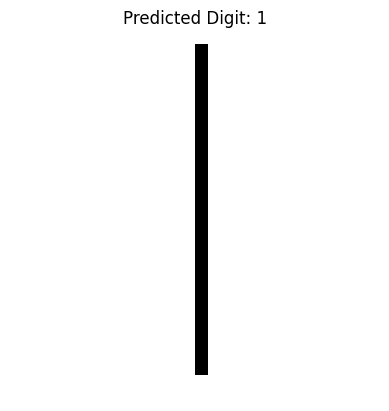

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('handwritten.keras')

# Path to the single image
file_path = '/content/digits/digit1.png'

try:
    # Load the image in grayscale
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28 as required by MNIST
    img = cv2.resize(img, (28, 28))

    # Invert and normalize
    img = np.invert(img)
    img = img / 255.0

    # Reshape to match model input
    img = img.reshape(1, 28, 28)

    # Predict
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    print(f"This digit is probably a {predicted_digit}")

    # Display the image
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error processing {file_path}: {e}")


In [ ]:
# ====== PART 1: TRAIN AND SAVE MODEL ======
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load MNIST data and normalize it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a better model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),                      # Dropout to reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')    # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

# Save and reload model
model.save('handwritten.keras')
model = tf.keras.models.load_model('handwritten.keras')

# Evaluate model performance
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8147 - loss: 0.5966 - val_accuracy: 0.9707 - val_loss: 0.1026
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9505 - loss: 0.1712 - val_accuracy: 0.9727 - val_loss: 0.0923
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9628 - loss: 0.1246 - val_accuracy: 0.9762 - val_loss: 0.0734
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9694 - loss: 0.1004 - val_accuracy: 0.9805 - val_loss: 0.0699
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0845 - val_accuracy: 0.9823 - val_loss: 0.0605
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9759 - loss: 0.0770 - val_accuracy: 0.9785 - val_loss: 0.0724
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9775 - loss: 0.0693 - val_accuracy: 0.9827 - val_loss: 0.0602
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9787 - loss: 0.0644 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
/content/digits/digit1.png → This digit is probably a 1


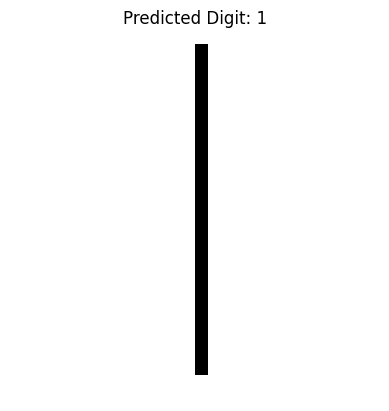

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
/content/digits/digit2.png → This digit is probably a 6


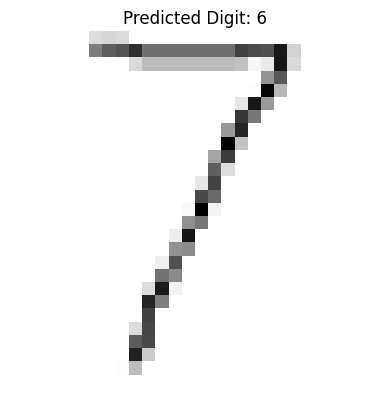

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
/content/digits/digit3.png → This digit is probably a 5


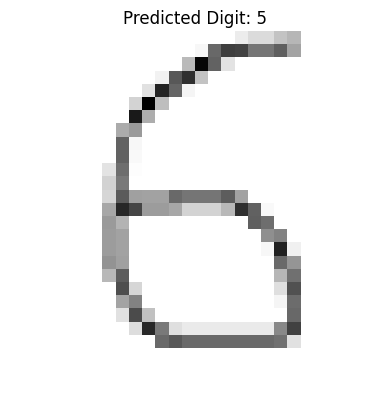

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
/content/digits/digit4.png → This digit is probably a 2


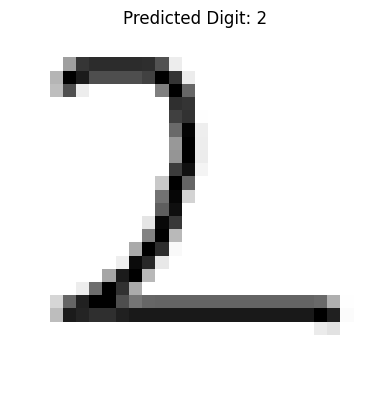

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
/content/digits/digit5.png → This digit is probably a 6


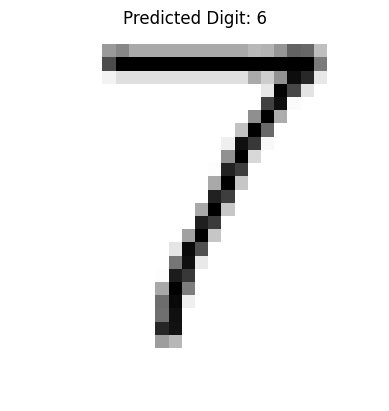

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
/content/digits/digit6.png → This digit is probably a 3


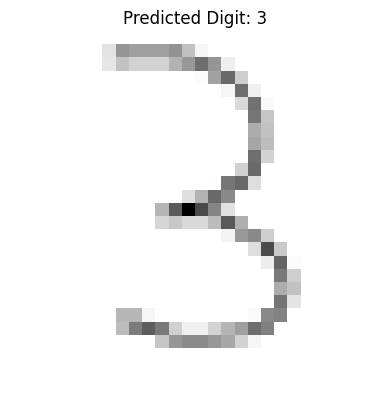

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
/content/digits/digit7.png → This digit is probably a 8


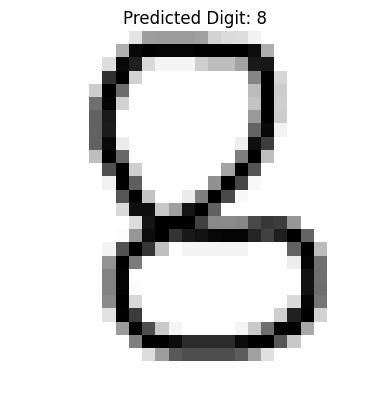

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
/content/digits/digit8.png → This digit is probably a 5


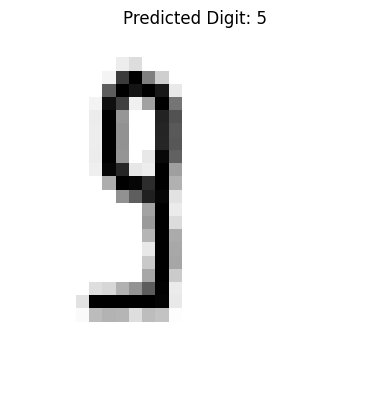

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
/content/digits/digit9.png → This digit is probably a 5


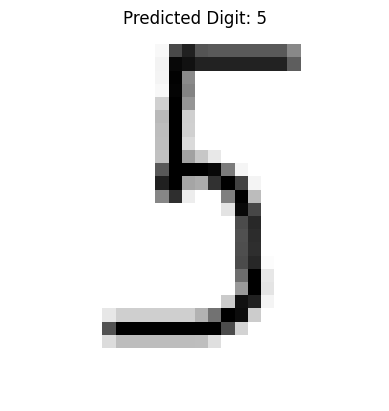

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
/content/digits/digit10.png → This digit is probably a 0


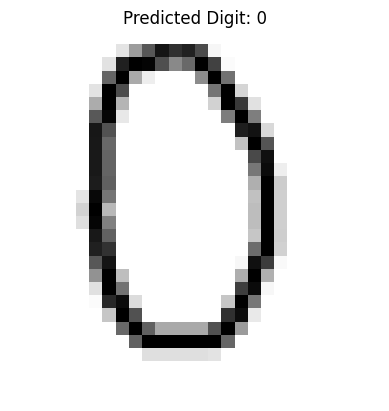

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('handwritten.keras')

# Start from digit1.png
image_number = 1
file_path = f'/content/digits/digit{image_number}.png'

while os.path.isfile(file_path):
    try:
        # Read image as grayscale
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        # Resize to 28x28
        img = cv2.resize(img, (28, 28))

        # Invert and normalize pixel values
        img = np.invert(img)
        img = img / 255.0

        # Reshape to match model input
        img = img.reshape(1, 28, 28)

        # Predict digit
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)

        # Output prediction
        print(f"{file_path} → This digit is probably a {predicted_digit}")

        # Display the image
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.title(f"Predicted Digit: {predicted_digit}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

    finally:
        # Move to next image
        image_number += 1
        file_path = f'/content/digits/digit{image_number}.png'
